# Scientific Python: 1

<br><br><br>

<span style="font-size: 24pt; font-weight: bold">Why Python?</span>

<br><br><br>

<br><br><br>

It's the most commonly used language for data analysis and machine learning:

<img src="img/analytics-by-language.svg">

<br><br><br>

<br><br><br>

It's a rather nice language, but I don't think that's the whole reason.

<br><br>

It's **well-connected**. Just about everything has a Python interface, which is due (again) to its popularity.

<br><br>

But being connected is especially good for data analysis: if you need a library that does X, you'll rarely have trouble finding one.

<br><br><br>

<br><br><br>

In these four tutorials, we'll look at the ways Python is used in particle physics and science in general.

<br><br>

First, we should review Python basics, since we'll be using it so much.

<br><br>

I'll do it in the context of analyzing particle data.

<br><br><br>

## Navigation in Jupyter

<br><br><br>

1. Click the "..." to make a cell visible, but don't go ahead of me: follow along!
2. Click a code cell to edit it.
3. Control-enter to run the cell.
4. Shift-enter to run the cell and move to the next one.

<br><br><br>

## Python basics

### Python as a desk calculator

In [76]:
2 + 2

4

In [77]:
px = -17.945541
py = 13.1652603
pz = 64.3908386
E = 68.1289790

In [78]:
px

-17.945541

${p_x}^2 + {p_y}^2$

In [79]:
px**2 + py**2

495.36652054943704

$\displaystyle \sqrt{{p_x}^2 + {p_y}^2 + {p_z}^2}$

In [126]:
(px**2 + py**2 + pz**2)**(1/2)

68.12889707136529

$\displaystyle p = \sqrt{{p_x}^2 + {p_y}^2 + {p_z}^2}$

$\displaystyle m = \sqrt{E^2 - p^2}$

**Quizlet:** fix the mistake!

In [127]:
m = (E**2 - px**2 + py**2 + pz**2)**(1/2)
m

92.94632597460625

## Functions

In [133]:
def euclidean(x, y, z):
    return (x**2 + y**2 + z**2)**(1/2)

In [134]:
euclidean(px, py, pz)

68.12889707136529

In [136]:
def minkowski(time, space):
    return (time**2 - space**2)**(1/2)

In [137]:
minkowski(E, euclidean(px, py, pz))

0.10565709515008793

Indenting?

In [139]:
def mass(E, px, py, pz):
    def euclidean(x, y, z):
        return (x**2 + y**2 + z**2)**(1/2)
    
    def minkowski(time, space):
        return (time**2 - space**2)**(1/2)
    
    return minkowski(E, euclidean(px, py, pz))

mass(E, px, py, pz)

0.10565709515008793

Note: functions are objects that can be assigned to variables, too.

In [140]:
mag3d = euclidean

In [141]:
mag3d(px, py, pz)

68.12889707136529

## Importing functionality into Python

In [117]:
import math

In [119]:
math

<module 'math' from '/home/jpivarski/mambaforge/lib/python3.9/lib-dynload/math.cpython-39-x86_64-linux-gnu.so'>

Usually, you want to access named functions within the module with a dot.

In [118]:
math.sqrt(E**2 - px**2 - py**2 - pz**2)

0.10565709514578395

It prevents functions with the same names in different libraries from conflicting.

In [120]:
import numpy

In [121]:
numpy.sqrt

<ufunc 'sqrt'>

In [122]:
math.sqrt

<function math.sqrt(x, /)>

In [124]:
numpy.sqrt is math.sqrt

False

Some libraries have conventional "short names."

In [86]:
import numpy as np

In [87]:
np.sqrt(E**2 - px**2 - py**2 - pz**2)

0.10565709514578395

Sometimes, it's better to extract only one object from a library.

In [99]:
from hepunits import GeV
from particle import Particle

In [100]:
muon = Particle.from_name("mu+")
muon

<Particle: name="mu+", pdgid=-13, mass=105.6583755 ± 0.0000023 MeV>

In [102]:
muon.mass / GeV

0.1056583755

In [104]:
?muon

Type:           Particle
String form:    mu+
File:           ~/mambaforge/lib/python3.9/site-packages/particle/particle/particle.py
Docstring:     
The Particle object class. Hold a series of properties for a particle.

Class properties:

C
    The charge conjugation parity quantum number, if relevant.
    It is C = (-1)^(L+S) for self-conjugate mesons.
    Mesons with PDG IDs of the kind 9XXXXXX (N=9) are not experimentally well-known particles
    and None is returned.

G
    The G-parity quantum number, if relevant.

I
    The isospin quantum number, if relevant.

P
    The parity quantum number, if relevant.
    It is P = (-1)^(L+1) for self-conjugate mesons and -1 for the photon.
    Mesons with PDG IDs of the kind 9XXXXXX (N=9) are not experimentally well-known particles
    and None is returned.

anti_flag
    The particle-antiparticle flag.

    A = B     - particle that has anti-particle partner different from particle
                with ASCII name formed by concatenation of

## Data types

Python data have types, but unlike C++, type correctness is checked just before computation, not in a separate compilation phase.

In [105]:
1 + "2"

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [106]:
type(1)

int

In [107]:
type("2")

str

_Therefore_, types are objects that you can use at runtime, unlike C++.

In [110]:
t1 = type(1)
t1

int

In [111]:
t2 = type("2")
t2

str

In [125]:
t1 is t2

False

Most type objects are functions that create or convert data to that type.

In [113]:
int("2")

2

In [114]:
t1("2")

2

**Quizlet:** before you run it, what will this do?

In [116]:
type(type(1)("2"))

int

### Type hierarchies

NumPy has some types that look like standard Python types, but they're not.

In [161]:
np_one = np.int32(1)
np_one

1

In [162]:
np_int = type(np_one)
np_int

numpy.int32

`np.int32` is not Python `int`.

In [163]:
np_int == int

False

`np.int32` is also not `np.int64`.

In [150]:
np_int == type(np.int64(1))

False

`isinstance` is a better way to check the type of something.

It doesn't ask, "Is this type object the same object as this other one?"

It asks, "Is this value an instance of this type?"

In [164]:
isinstance(np_one, np.int32)

True

Because some types are _supertypes_ of others.

`np.integer` is a supertype of `np.int32` because any `np.int32` instance is also an `np.integer` instance.

In [165]:
isinstance(np_one, np.integer)

True

`np.integer` is a supertype of `np.int64` because any `np.int64` instance is also an `np.integer` instance.

In [166]:
isinstance(np.int64(1), np.integer)

True

<img src="img/dtype-hierarchy.png">

`mro` (method resolution order) gives a list of all of a type's supertypes.

In [159]:
np.int32.mro()

[numpy.int32,
 numpy.signedinteger,
 numpy.integer,
 numpy.number,
 numpy.generic,
 object]

We see that the only supertypes `np.int32` and `int` have in common is `object`.

(Everything in Python is an `object`.)

In [160]:
int.mro()

[int, object]

In [155]:
import numbers

In [157]:
isinstance(np.int32(1), numbers.Integral)

True

In [158]:
isinstance(1, numbers.Integral)

True

## Collection types

The two most basic collection types in Python are `list` and `dict`.

In [201]:
some_list = [0.0, 1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9]
some_list

[0.0, 1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9]

In [202]:
type(some_list)

list

In [203]:
len(some_list)

10

In [204]:
some_dict = {"one": 1.1, "two": 2.2, "three": 3.3}
some_dict

{'one': 1.1, 'two': 2.2, 'three': 3.3}

In [205]:
type(some_dict)

dict

In [206]:
len(some_dict)

3

You can take data out of a collection with square brackets: `[` `]`.

In [207]:
some_list[3]

3.3

In [208]:
some_dict["two"]

2.2

You can also change the data in a collection that way.

In [209]:
some_list[3] = 33333

In [210]:
some_list

[0.0, 1.1, 2.2, 33333, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9]

In [211]:
some_dict["two"] = 22222

In [212]:
some_dict

{'one': 1.1, 'two': 22222, 'three': 3.3}

In [215]:
some_list.append("mixed types")

In [216]:
some_list

[0.0, 1.1, 2.2, 33333, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9, 'mixed types']

In [213]:
some_dict[123] = "mixed types"

In [214]:
some_dict

{'one': 1.1, 'two': 22222, 'three': 3.3, 123: 'mixed types'}

Ranges within a list can be "sliced" with `:`.

In [219]:
some_list[2:8]

[2.2, 33333, 4.4, 5.5, 6.6, 7.7]

**Quizlet:** before you run it, what will this do?

In [221]:
some_list[2:8][3]

5.5

**Philosophical question:** why does indexing start with zero?

## A little data analysis

In [222]:
particles = [
    {"type": "electron", "px": 38.4242935, "py": -28.779644, "pz": 165.006927, "E": 171.848714, "charge": 1},
    {"type": "electron", "px": -34.431419, "py": 24.6730384, "pz": 131.864776, "E": 138.501266, "charge": -1},
    {"type": "muon", "px": -17.945541, "py": 13.1652603, "pz": 64.3908386, "E": 68.1289790, "charge": 1},
    {"type": "muon", "px": -8.1843795, "py": -7.6400470, "pz": 15.1420097, "E": 18.8320473, "charge": -1},    
]

In [223]:
def parent(particle1, particle2):
    ...

In [72]:
total_px = particles[0]["px"] + particles[1]["px"] + particles[2]["px"] + particles[3]["px"]
total_py = particles[0]["py"] + particles[1]["py"] + particles[2]["py"] + particles[3]["py"]
total_pz = particles[0]["pz"] + particles[1]["pz"] + particles[2]["pz"] + particles[3]["pz"]
total_E = particles[0]["E"] + particles[1]["E"] + particles[2]["E"] + particles[3]["E"]

np.sqrt(total_E**2 - (total_px**2 + total_py**2 + total_pz**2))

125.23413366311769

In [73]:
total_px = particles[0]["px"] + particles[1]["px"]
total_py = particles[0]["py"] + particles[1]["py"]
total_pz = particles[0]["pz"] + particles[1]["pz"]
total_E = particles[0]["E"] + particles[1]["E"]

np.sqrt(total_E**2 - (total_px**2 + total_py**2 + total_pz**2))

90.28562890933117

In [75]:
total_px = particles[2]["px"]
total_py = particles[2]["py"]
total_pz = particles[2]["pz"]
total_E = particles[2]["E"]

np.sqrt(total_E**2 - (total_px**2 + total_py**2 + total_pz**2))

0.10565709514578395

In [52]:
events[ak.any(abs(events.electron.px - 38.4242935) < 0.00001, axis=-1)].electron.mass

<Array [[0.0433, -0.0279]] type='1 * var * float32'>

In [1]:
import awkward as ak
import numpy as np

In [2]:
import vector

vector.register_awkward()

In [3]:
events = ak.from_parquet("data/SMHiggsToZZTo4L.parquet")

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

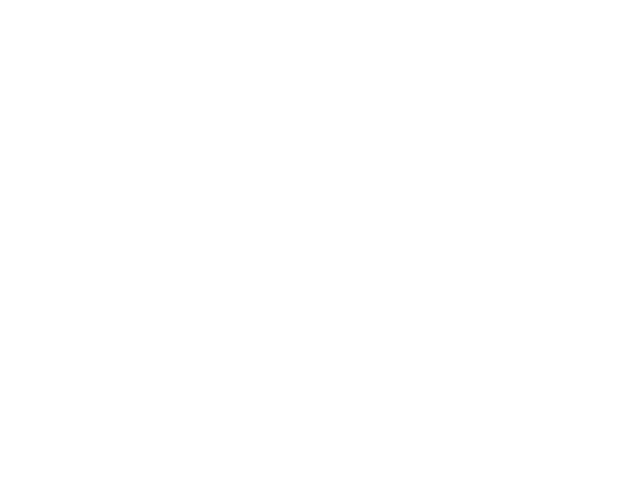

In [5]:
%matplotlib widget

fig = plt.figure()

In [13]:
def beam(ax):
    ax.plot([0, 0], [0, 0], [-100, 100], c="black", ls=":")


def cms(ax):
    z = np.linspace(-100, 100, 50)
    theta = np.linspace(0, 2 * np.pi, 12)
    theta_grid, z_grid = np.meshgrid(theta, z)
    x_grid = 100 * np.cos(theta_grid)
    y_grid = 100 * np.sin(theta_grid)
    ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.2, color="red")

In [25]:
fig.clf()
ax = fig.add_subplot(111, projection="3d")

for event in events[:3]:  # 6417 : 6417 + 1
    for p in event.electron:
        x0 = event.PV.x - p.dxy * np.cos(p.phi)
        y0 = event.PV.y - p.dxy * np.sin(p.phi)
        z0 = event.PV.z - p.dz
        ax.plot([x0, x0 + p.px], [y0, y0 + p.py], [z0, z0 + p.pz], c="blue")
    for p in event.muon:
        x0 = event.PV.x - p.dxy * np.cos(p.phi)
        y0 = event.PV.y - p.dxy * np.sin(p.phi)
        z0 = event.PV.z - p.dz
        ax.plot([x0, x0 + p.px], [y0, y0 + p.py], [z0, z0 + p.pz], c="green")

beam(ax)
cms(ax)

ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)
ax.set_zlim(-100, 100)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
None